In [ ]:
import shutil, os, subprocess
#from google.colab import drive
#drive.mount('/content/drive')
#os.makedirs('/content/drive/MyDrive/llama3b/', exist_ok=True)
#os.chdir('/content/drive/MyDrive/llama3b/')

Mounted at /content/drive


In [ ]:
#!pip install networkx

In [ ]:
import networkx as nx
import json
import matplotlib.pyplot as plt

G = nx.DiGraph()
file_name = 'posts_data.json'
posts_data = dict()

with open(file_name, 'r') as f:
  posts_data = json.load(f)

932


In [ ]:
posts_data_int_keys = {}
for post_id_str, post_data in posts_data.items():
    post_id_int = int(post_id_str)
    posts_data_int_keys[post_id_int] = post_data

with open('post_data_int.json', 'w') as f:
    json.dump(posts_data_int_keys, f, indent=4)

posts_data = posts_data_int_keys

In [ ]:
for post_id, post_data in posts_data.items():
  G.add_node(post_id, toxicity=post_data['toxicity'])
  for reply_id in post_data['replies']:
    G.add_edge(post_id, reply_id)
#for post_id, post_data in posts_data.items():
#  for reply_id in post_data['replies']:
#    G.add_edge(post_id, reply_id)

num_nodes = G.number_of_nodes()
print(f"Number of nodes in the graph: {num_nodes}")
num_edges = G.number_of_edges()
print(f"Number of edges in the graph: {num_edges}")

Number of nodes in the graph: 932
Number of edges in the graph: 1152


In [ ]:
toxicity_vals = nx.get_node_attributes(G, 'toxicity').values()
min_tox = min(toxicity_vals)
max_tox = max(toxicity_vals)

norm = lambda x: (x - min_tox) / (max_tox - min_tox)

cmap = plt.cm.RdBu
node_colors = [cmap(norm(x)) for x in toxicity_vals]

In [ ]:
num_nodes = G.number_of_nodes()

Number of nodes in the graph: 932


<ipython-input-107-14507f99b53f>:6: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Toxicity")


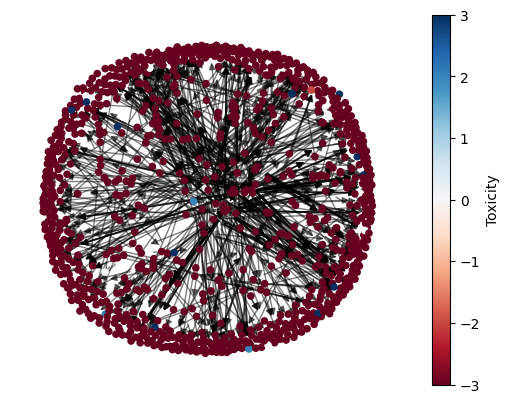

In [ ]:
pos = nx.spring_layout(G, k=0.15, iterations=50)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.5)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_tox, vmax=max_tox))
sm.set_array([])
plt.colorbar(sm, label="Toxicity")

plt.axis('off')
plt.show()